In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install pyarrow


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df = pd.read_parquet('data/data.parquet')
labels = pd.read_csv('data/labels.csv')

In [3]:
df.head(10)

,MachineId,MeasurementId,Pressure
0,0_0_0,0,0.0
1,0_0_0,0,0.0
2,0_0_0,0,0.0
3,0_0_0,0,0.0
4,0_0_0,0,0.0
5,0_0_0,0,0.0
6,0_0_0,0,0.0
7,0_0_0,0,0.0
8,0_0_0,0,0.0
9,0_0_0,0,0.0


In [4]:
len(labels)

27385

In [5]:
labels.head(10)

,MachineId,MeasurementId,PumpFailed,SlowStart,SlowEnd
0,0_0_0,0,False,False,False
1,0_0_1,-1,NaN,NaN,NaN
2,0_0_2,0,False,False,False
3,0_0_3,0,True,False,False
4,0_1_0,-1,NaN,NaN,NaN
5,0_1_1,1,True,False,False
6,0_1_2,-1,NaN,NaN,NaN
7,0_1_3,-1,NaN,NaN,NaN
8,1_0_0,2,False,True,False
9,1_0_1,-1,NaN,NaN,NaN


In [6]:
labels['PumpFailed'].isna().sum()

485

In [7]:
nans_in_labels = labels[labels['PumpFailed'].isna()]

In [8]:
nans_in_labels['MeasurementId'].unique()

array([-1], dtype=int64)

In [9]:
to_remove = df['MachineId'].isin(nans_in_labels['MachineId']) & df['MeasurementId'].isin(nans_in_labels['MeasurementId'])

In [10]:
df = df[~to_remove]

In [11]:
labels.dropna(subset = ['PumpFailed'],inplace = True)

In [12]:
def my_groupby(dataframe,col_name):
    dfdict = {}
    for item,group in dataframe.groupby(col_name):
        dfdict[item] = group.drop(columns = col_name)
    return dfdict

In [13]:
data = my_groupby(df,'MachineId')

In [14]:
data = {key : my_groupby(value,'MeasurementId') for key,value in data.items()}

First let's explore how measurements looks like.

<Axes: >

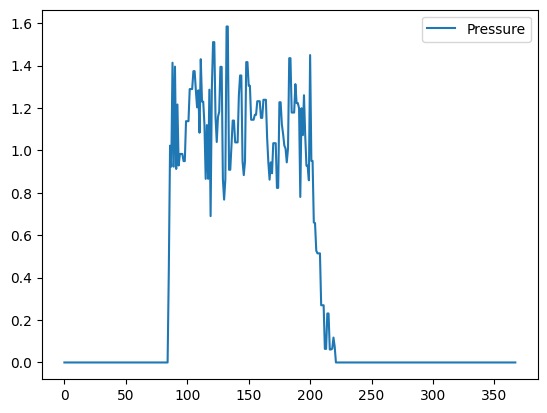

In [15]:
data['0_0_0'][0].plot()

In [16]:
data.keys()

dict_keys(['0_0_0', '0_0_1', '0_0_2', '0_0_3', '0_1_0', '0_1_1', '0_1_2', '0_1_3', '0_2_0', '0_2_1', '0_2_2', '0_2_3', '0_3_0', '0_3_1', '0_3_2', '0_3_3', '10_0_0', '10_0_1', '10_0_2', '10_0_3', '10_2_0', '10_2_1', '10_2_2', '10_2_3', '11_0_0', '11_0_1', '11_0_2', '11_0_3', '11_2_0', '11_2_1', '11_2_2', '11_2_3', '13_2_0', '13_2_1', '13_2_2', '13_2_3', '14_0_0', '14_0_1', '14_0_2', '14_0_3', '14_1_0', '14_1_1', '14_1_2', '14_1_3', '14_2_0', '14_2_1', '14_2_2', '14_2_3', '15_0_0', '15_0_1', '15_0_3', '15_2_0', '15_2_1', '15_2_2', '15_2_3', '15_3_0', '15_3_1', '15_3_2', '15_3_3', '16_2_0', '17_0_0', '17_0_1', '17_0_2', '17_0_3', '17_2_0', '17_2_1', '17_2_2', '17_2_3', '18_2_0', '18_2_1', '18_2_2', '18_2_3', '19_2_0', '19_2_1', '19_2_2', '19_2_3', '1_0_0', '1_0_1', '1_0_2', '1_0_3', '1_2_0', '1_2_1', '1_2_2', '1_2_3', '21_0_0', '21_0_1', '21_0_2', '21_0_3', '21_1_0', '21_1_1', '21_1_2', '21_1_3', '21_2_0', '21_2_1', '21_2_2', '21_2_3', '22_0_2', '22_0_3', '22_1_0', '22_1_1', '22_1_3', '22

In [21]:
data['6_2_2'].keys()

dict_keys([173, 175, 176, 178, 180, 183, 187, 188, 189, 192, 6510, 6516])

,MachineId,MeasurementId,PumpFailed,SlowStart,SlowEnd
486,6_2_2,178,True,NaN,NaN


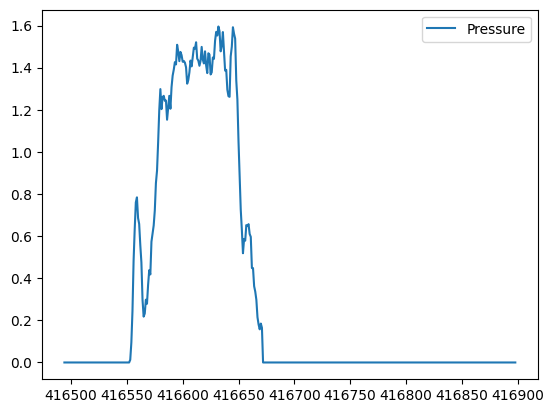

In [22]:
data['6_2_2'][178].plot()
labels[(labels['MachineId'] == '6_2_2') & (labels['MeasurementId'] == 178)]


In [23]:
import random

In [24]:
def graph(machine,measurement):
    label = labels[(labels['MachineId'] == machine) & (labels['MeasurementId'] == measurement)]['PumpFailed']
    print(str(label))
    data[machine][measurement].plot(title = str(label))

486    True
Name: PumpFailed, dtype: object


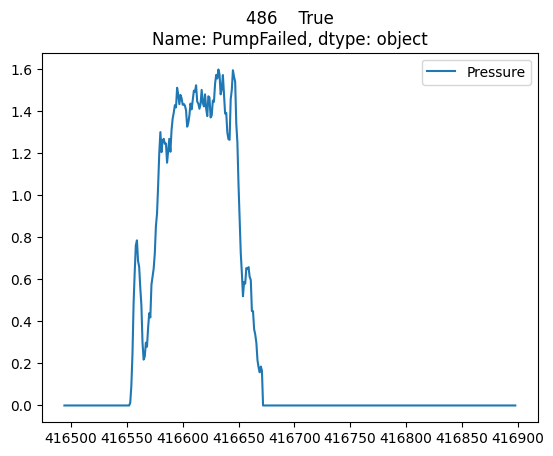

In [25]:
graph('6_2_2',178)

In [26]:
#random arguments so that we don't have to type IDs every single time
def give_random_arguments(dict1):
    rand_key_1 = random.choice(list(dict1))
    rand_key_2 = random.choice(list(dict1[rand_key_1]))
    return rand_key_1, rand_key_2
    

In [27]:
give_random_arguments(data)

('59_0_1', 4372)

7632    True
Name: PumpFailed, dtype: object


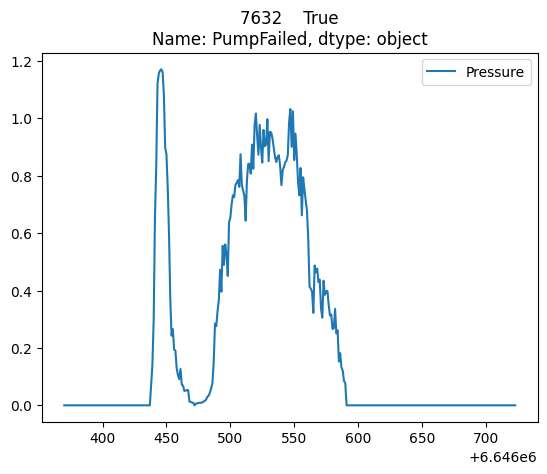

In [28]:
graph(*give_random_arguments(data))

3207    True
Name: PumpFailed, dtype: object


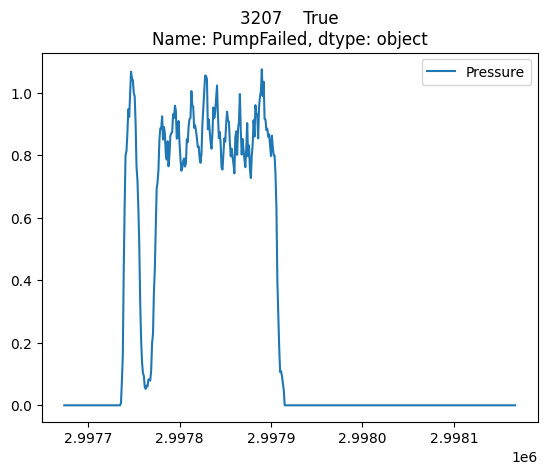

In [29]:
graph(*give_random_arguments(data))

12352    False
Name: PumpFailed, dtype: object


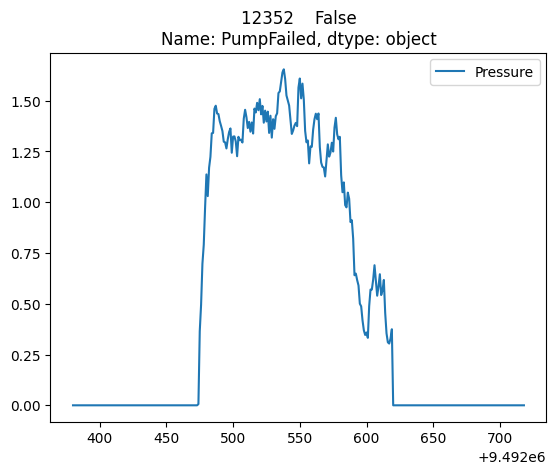

In [30]:
graph(*give_random_arguments(data))

13555    False
Name: PumpFailed, dtype: object


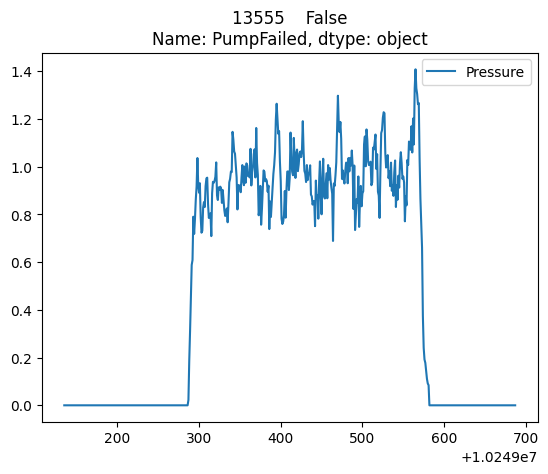

In [31]:
graph(*give_random_arguments(data))

12378    False
Name: PumpFailed, dtype: object
12443    False
Name: PumpFailed, dtype: object


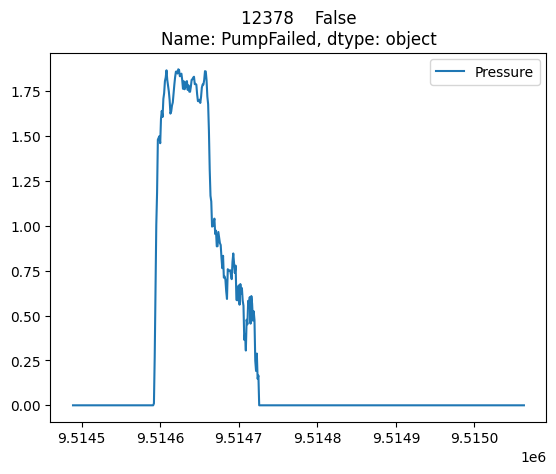

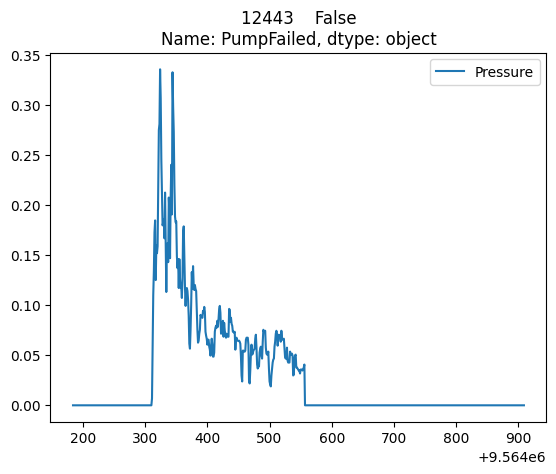

In [28]:
graph(*give_random_arguments(data))
graph(*give_random_arguments(data))

3    True
Name: PumpFailed, dtype: object


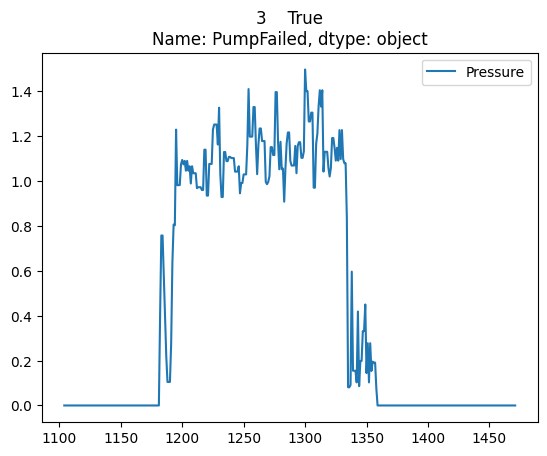

In [32]:
graph('0_0_3',0)

From all the graphs above we might conclude how we would be able to predict pump failure. In short, pump failed if the air pressure reached certain level and then suddenly dropped, now we need to select the correct model. We have muplitple options, we can treat the data as functions and perform some kind of functional logistic regression. we can treat the data as multi dimensional (several hundreds) discrete features. Since all the features are of the same kind, principal value decomposition (which is common solution, when we have too many features) might not provide us any useful results. Let's try to perform some statistical analysis, from the first view something like variance of data might be simple yet good predictor of pump failure.

## Statistical approach

In [33]:
give_random_arguments(data)

('69_0_1', 3825)

In [34]:
type(data['8_2_1'][429])

pandas.core.frame.DataFrame

In [35]:
(data['8_2_1'][429] != 0)

,Pressure
981776,False
981777,False
981778,False
981779,False
981780,False
...,...
982415,False
982416,False
982417,False
982418,False


In [36]:
#removing zeros from each measurement
for key in data:
    for k in data[key]:
        mask = data[key][k] == 0
        data[key][k] = data[key][k][~mask]

7878    True
Name: PumpFailed, dtype: object


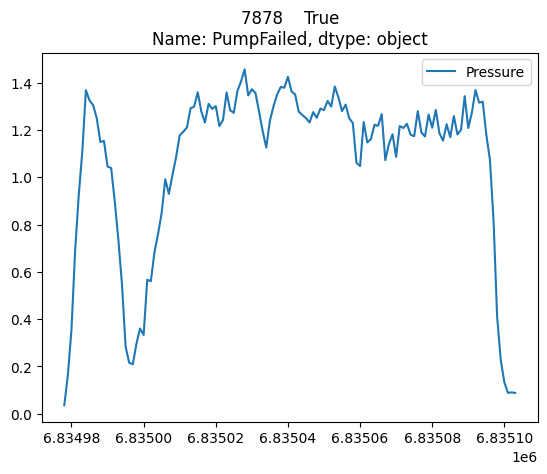

In [37]:
graph(*give_random_arguments(data))

9063    False
Name: PumpFailed, dtype: object


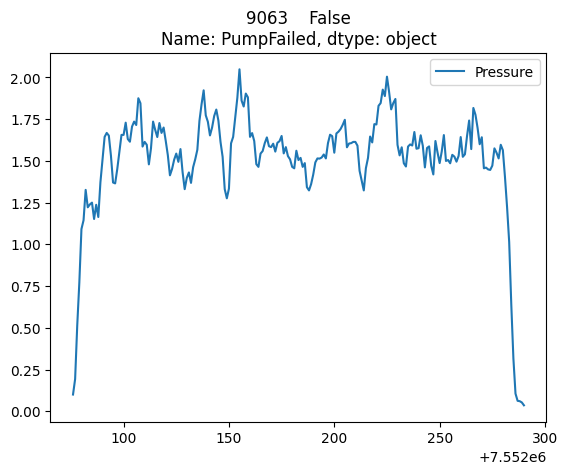

In [38]:
graph(*give_random_arguments(data))

First let's try to define function, that will return us variance of values over the first half of the measurement. It was hinted for us that pump failure is caused by sudden pressure drop in the first half of the cycle. By chosing only the first half we also get rid of unwanted variance caused by slow pressure drop in some measurement. So let's try train our first model with this very naive aproach.

In [39]:
def variance(dataframe):
    midpoint = int(dataframe.first_valid_index() + (dataframe.last_valid_index()-dataframe.first_valid_index())//2)
    return dataframe.iloc[:midpoint].var().iloc[0]
    

In [40]:
variance(data['73_3_2'][4368])

0.03836226506473032

12358    False
Name: PumpFailed, dtype: object


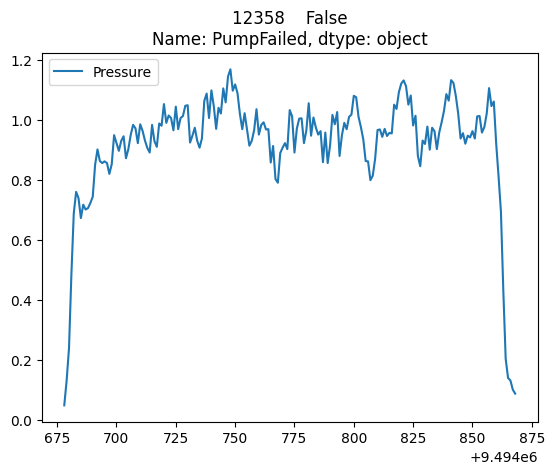

In [41]:
graph('73_3_2',4368)

Now we would like to get our data in shape, that can be actually fed to our model, something like column of ID, column of corresponding variance and column wheter the pump failed or not.

In [42]:
ID = []
var = []

for key in data:
    for k in data[key]:
        try:
            var.append(variance(data[key][k]))
            ID.append(key + '-' + str(k))
        except:
            continue


In [43]:
labels['MeasurementId'] = labels['MeasurementId'].astype(str)
labels['ID'] = labels['ID'] = labels['MachineId'] + '-' + labels['MeasurementId']

In [44]:
labels

,MachineId,MeasurementId,PumpFailed,SlowStart,SlowEnd,ID
0,0_0_0,0,False,False,False,0_0_0-0
2,0_0_2,0,False,False,False,0_0_2-0
3,0_0_3,0,True,False,False,0_0_3-0
5,0_1_1,1,True,False,False,0_1_1-1
8,1_0_0,2,False,True,False,1_0_0-2
...,...,...,...,...,...,...
27380,10_0_2,8833,False,False,False,10_0_2-8833
27381,10_0_3,8833,False,False,False,10_0_3-8833
27382,10_0_0,8834,False,False,False,10_0_0-8834
27383,10_0_1,8834,False,False,True,10_0_1-8834


In [45]:
data_variance = pd.DataFrame({'ID':ID,'variance':var})

In [46]:
data_variance = pd.merge(data_variance, labels[['ID','PumpFailed']], on = 'ID')

In [47]:
data_variance.dropna(subset = ['variance'], inplace = True)

In [48]:
data_variance.isna().sum()

ID            0
variance      0
PumpFailed    0
dtype: int64

In [49]:
data_variance[25320:25350]

,ID,variance,PumpFailed
25321,9_3_1-5173,0.037358,False
25322,9_3_1-5174,0.055018,False
25323,9_3_1-5175,0.031427,False
25324,9_3_1-5176,0.042335,False
25325,9_3_1-5177,0.041435,False
25326,9_3_1-5178,0.070474,False
25327,9_3_1-5179,0.019718,False
25328,9_3_2-503,0.029963,False
25329,9_3_2-505,0.038866,False
25330,9_3_2-506,0.042224,True


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [85]:
x = np.array(data_variance['variance'])
y = np.array(data_variance['PumpFailed'])

encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [88]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [87]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [89]:
prediction = log_model.predict(x_test)

In [92]:
cm = confusion_matrix(y_test,prediction)

In [93]:
cm

array([[4780,    0],
       [ 588,    0]], dtype=int64)

In [95]:
prediction.sum()

0

Seem like our aproach was indeed too naive. Logistic regression predicted all False.

In [98]:
data_variance['variance'][data_variance['PumpFailed'] == True].mean()

0.10955776727302967

In [99]:
data_variance['variance'][data_variance['PumpFailed'] == False].mean()

0.09617117325611318

From mean values above, it is clear, that little sudden decrease in pressure when the pump failed doesn't have much effect on overall variance. Perhaps some more feature preparation would improve performance (scaling, getting rid of tail in beggining of the cycle). Let us take completly different approach.

## Neural Net

In [160]:
df = pd.read_parquet('data/data.parquet')
labels = pd.read_csv('data/labels.csv')

In [161]:
data = my_groupby(df,'MachineId')
data = {key : my_groupby(value,'MeasurementId') for key,value in data.items()}

In [162]:
def remove(dict,value):
    return {key:val for key,val in dict.items() if key != value}

In [163]:
for key in data:
     data[key] = remove(data[key],-1)

In [164]:
for key in list(data.keys()):
    for k in list(data[key].keys()):
        if (data[key][k]['Pressure'] == 0).all():
            del data[key][k]

In [165]:
X = []
for key in data:
    for k in data[key]:
        X.append(data[key][k]['Pressure'])

In [166]:
y = []
for key in data:
    for k in data[key]:
        y.append(labels['PumpFailed'][(labels['MachineId'] == key) & (labels['MeasurementId'] == k)].iloc[0])

In [167]:
def remove_zeros(series):
    if series.iloc[0] == 0:
        non_zero = series[series != 0]
        first_index = series[series == non_zero.iloc[0]].index[0]
        last_index = series[series == non_zero.iloc[-1]].index[-1]
        return series.loc[first_index:last_index]
    else:
        return series

In [168]:
for i in range(len(X)):
    X[i] = remove_zeros(X[i])

In [169]:
X[300]

12761248    0.131057
12761249    0.430617
12761250    0.823789
12761251    0.997797
12761252    0.972467
              ...   
12761378    0.157489
12761379    0.104626
12761380    0.104626
12761381    0.243392
12761382    0.243392
Name: Pressure, Length: 135, dtype: float64

In [170]:
len(X)

26838

In [171]:
len(y)

26838

In [172]:
lengths = ([len(i) for i in X])

In [173]:
sorted(lengths)[:20]

[1, 2, 2, 2, 3, 3, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 14, 15, 15, 16]

In [174]:
sorted(lengths,reverse = True)[:20]

[1038,
 983,
 955,
 952,
 913,
 910,
 907,
 907,
 893,
 871,
 829,
 827,
 817,
 815,
 808,
 808,
 806,
 802,
 797,
 796]

In [175]:
for item in lengths:
    if item < 50:
        index = lengths.index(item)
        del X[index]
        del y[index]

In [176]:
max_length = sorted(lengths, reverse = True)[0]

In [177]:
#in cells above we removed zero from the beginning, now we append zeros back on the end of each measurement cycle in order to get 
#feature vectors of the same lenth

for i in range(len(X)):
    X[i] = np.concatenate((X[i].values,np.zeros(max_length - len(X[i]))))

In [178]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

In [179]:
y.shape

(26784,)

In [181]:
len(X)

26784

In [182]:
import torch
import torch.nn as nn

X = torch.tensor(np.array(X), dtype = torch.float32)
y = torch.tensor(y, dtype = torch.float32)

In [183]:
y.shape

torch.Size([26784])

In [184]:
y = y.unsqueeze(1)

In [195]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X  = torch.tensor(np.array(X), dtype = torch.float32)

In [196]:
class NetClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(1038,1038)
        self.activation1 = nn.ReLU()
        self.layer2 = nn.Linear(1038, 100)
        self.activation2 = nn.ReLU()
        self.layer3 = nn.Linear(100,10)
        self.activation3 = nn.ReLU()
        self.layer4 = nn.Linear(10,1)
        self.sigmoid = nn.Sigmoid()
    def forward(self,x):
        x = self.activation1(self.layer1(x))
        x = self.activation2(self.layer2(x))
        x = self.activation3(self.layer3(x))
        x = self.sigmoid(self.layer4(x))
        return x

In [203]:
import copy
import torch.optim as optim
import tqdm

def train_model(model,X_train,y_train,X_val,y_val):
    loss_fn = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    n_epochs = 100
    batch_size = 64
    batch_start = torch.arange(0,len(X_train),batch_size)
    best_acc = -np.inf
    best_weights = None

    for epoch in range(n_epochs):
        print(epoch)
        model.train()
        with tqdm.tqdm(batch_start, unit = "batch", disable = False) as bar:
            bar.set_description(f"Epoch{epoch}")
            for start in bar:
                X_batch = X_train[start:start + batch_size]
                y_batch = y_train[start:start + batch_size]
                y_pred = model(X_batch)
                loss = loss_fn(y_pred, y_batch)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                acc = (y_pred.round() == y_batch).float().mean()
                bar.set_postfix(loss = float(loss), acc = float(acc))
        model.eval()
        y_pred = model(X_val)
        acc = (y_pred.round() == y_val).float().mean()
        acc = float(acc)
        if acc > best_acc:
            best_acc = acc
            best_weights = copy.deepcopy(model.state_dict())
    model.load_state_dict(best_weights)
    return best_acc

In [204]:
from sklearn.model_selection import StratifiedKFold, train_test_split


kfold = StratifiedKFold(n_splits=5,shuffle = True)
cv_scores = []
confusionmatrix = []
for train,test in kfold.split(X,y):
    model = NetClassifier()
    acc = train_model(model,X[train],y[train],X[test],y[test])
    print("Accuracy: %.2f" % acc)
    confusionmatrix.append(confusion_matrix(y[test],model(X[test]).detach().round()))
    cv_scores.append(acc)
acc = np.mean(cv_scores)
std = np.std(cv_scores)

0


Epoch0: 100%|█████████████████████████████████████████████████| 335/335 [00:05<00:00, 57.19batch/s, acc=1, loss=0.0802]


1


Epoch1: 100%|█████████████████████████████████████████████████| 335/335 [00:05<00:00, 57.64batch/s, acc=1, loss=0.0624]


2


Epoch2: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.88batch/s, acc=1, loss=0.0523]


3


Epoch3: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.90batch/s, acc=1, loss=0.0453]


4


Epoch4: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 54.78batch/s, acc=1, loss=0.0398]


5


Epoch5: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 54.54batch/s, acc=1, loss=0.0357]


6


Epoch6: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.15batch/s, acc=1, loss=0.0332]


7


Epoch7: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.97batch/s, acc=1, loss=0.0313]


8


Epoch8: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.09batch/s, acc=1, loss=0.0302]


9


Epoch9: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.75batch/s, acc=1, loss=0.0302]


10


Epoch10: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.48batch/s, acc=1, loss=0.029]


11


Epoch11: 100%|████████████████████████████████████████████████| 335/335 [00:07<00:00, 46.15batch/s, acc=1, loss=0.0293]


12


Epoch12: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 51.44batch/s, acc=1, loss=0.0298]


13


Epoch13: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.29batch/s, acc=1, loss=0.0304]


14


Epoch14: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 54.11batch/s, acc=1, loss=0.0304]


15


Epoch15: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.98batch/s, acc=1, loss=0.0309]


16


Epoch16: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 54.11batch/s, acc=1, loss=0.0316]


17


Epoch17: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 54.14batch/s, acc=1, loss=0.0316]


18


Epoch18: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.09batch/s, acc=1, loss=0.0328]


19


Epoch19: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.72batch/s, acc=1, loss=0.0332]


20


Epoch20: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.29batch/s, acc=1, loss=0.0333]


21


Epoch21: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 54.45batch/s, acc=0.98, loss=0.0338]


22


Epoch22: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 54.44batch/s, acc=0.98, loss=0.0343]


23


Epoch23: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 53.71batch/s, acc=0.98, loss=0.0348]


24


Epoch24: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 50.57batch/s, acc=0.98, loss=0.0362]


25


Epoch25: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 52.78batch/s, acc=0.98, loss=0.0369]


26


Epoch26: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 52.85batch/s, acc=0.98, loss=0.0369]


27


Epoch27: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 51.22batch/s, acc=0.98, loss=0.0371]


28


Epoch28: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 53.15batch/s, acc=0.98, loss=0.0376]


29


Epoch29: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 52.07batch/s, acc=0.98, loss=0.0365]


30


Epoch30: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 52.00batch/s, acc=0.98, loss=0.0383]


31


Epoch31: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 52.02batch/s, acc=0.98, loss=0.0381]


32


Epoch32: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 51.85batch/s, acc=0.98, loss=0.0372]


33


Epoch33: 100%|██████████████████████████████████████████████| 335/335 [00:06<00:00, 53.53batch/s, acc=0.98, loss=0.038]


34


Epoch34: 100%|██████████████████████████████████████████████| 335/335 [00:09<00:00, 33.58batch/s, acc=0.98, loss=0.037]


35


Epoch35: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 55.00batch/s, acc=0.98, loss=0.0363]


36


Epoch36: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 51.89batch/s, acc=0.98, loss=0.0379]


37


Epoch37: 100%|██████████████████████████████████████████████| 335/335 [00:06<00:00, 53.26batch/s, acc=0.98, loss=0.038]


38


Epoch38: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 53.57batch/s, acc=0.98, loss=0.0385]


39


Epoch39: 100%|██████████████████████████████████████████████| 335/335 [00:06<00:00, 53.40batch/s, acc=0.98, loss=0.038]


40


Epoch40: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 52.98batch/s, acc=0.98, loss=0.0367]


41


Epoch41: 100%|█████████████████████████████████████████████| 335/335 [00:11<00:00, 30.35batch/s, acc=0.98, loss=0.0379]


42


Epoch42: 100%|██████████████████████████████████████████████| 335/335 [00:07<00:00, 42.23batch/s, acc=0.98, loss=0.037]


43


Epoch43: 100%|█████████████████████████████████████████████| 335/335 [00:07<00:00, 44.41batch/s, acc=0.98, loss=0.0371]


44


Epoch44: 100%|█████████████████████████████████████████████| 335/335 [00:07<00:00, 45.98batch/s, acc=0.98, loss=0.0386]


45


Epoch45: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 50.96batch/s, acc=0.98, loss=0.0374]


46


Epoch46: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 51.41batch/s, acc=0.98, loss=0.0382]


47


Epoch47: 100%|███████████████████████████████████████████████| 335/335 [00:06<00:00, 51.96batch/s, acc=0.98, loss=0.04]


48


Epoch48: 100%|█████████████████████████████████████████████| 335/335 [00:10<00:00, 32.88batch/s, acc=0.98, loss=0.0367]


49


Epoch49: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 53.71batch/s, acc=0.98, loss=0.0401]


50


Epoch50: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 52.74batch/s, acc=0.98, loss=0.0392]


51


Epoch51: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 53.28batch/s, acc=0.98, loss=0.0379]


52


Epoch52: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 52.43batch/s, acc=0.98, loss=0.0358]


53


Epoch53: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 51.07batch/s, acc=0.98, loss=0.0346]


54


Epoch54: 100%|█████████████████████████████████████████████| 335/335 [00:10<00:00, 33.42batch/s, acc=0.98, loss=0.0372]


55


Epoch55: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 54.40batch/s, acc=0.98, loss=0.0355]


56


Epoch56: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 53.98batch/s, acc=0.98, loss=0.0386]


57


Epoch57: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 54.27batch/s, acc=0.98, loss=0.0359]


58


Epoch58: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 53.13batch/s, acc=0.98, loss=0.0333]


59


Epoch59: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 50.74batch/s, acc=0.98, loss=0.0352]


60


Epoch60: 100%|█████████████████████████████████████████████| 335/335 [00:09<00:00, 33.88batch/s, acc=0.98, loss=0.0343]


61


Epoch61: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 54.36batch/s, acc=0.98, loss=0.0312]


62


Epoch62: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 54.40batch/s, acc=0.98, loss=0.0287]


63


Epoch63: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 54.60batch/s, acc=0.98, loss=0.0292]


64


Epoch64: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 54.53batch/s, acc=0.98, loss=0.0258]


65


Epoch65: 100%|██████████████████████████████████████████████| 335/335 [00:06<00:00, 53.54batch/s, acc=0.98, loss=0.026]


66


Epoch66: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 51.27batch/s, acc=0.98, loss=0.0273]


67


Epoch67: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 54.74batch/s, acc=0.98, loss=0.0252]


68


Epoch68: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 54.81batch/s, acc=0.98, loss=0.0237]


69


Epoch69: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 31.79batch/s, acc=1, loss=0.0231]


70


Epoch70: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 51.28batch/s, acc=0.98, loss=0.0232]


71


Epoch71: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 55.34batch/s, acc=0.98, loss=0.0237]


72


Epoch72: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.08batch/s, acc=1, loss=0.0218]


73


Epoch73: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 31.05batch/s, acc=1, loss=0.0221]


74


Epoch74: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.19batch/s, acc=1, loss=0.0202]


75


Epoch75: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 54.59batch/s, acc=1, loss=0.0189]


76


Epoch76: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.43batch/s, acc=1, loss=0.0194]


77


Epoch77: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 50.58batch/s, acc=1, loss=0.0201]


78


Epoch78: 100%|████████████████████████████████████████████████| 335/335 [00:08<00:00, 40.60batch/s, acc=1, loss=0.0188]


79


Epoch79: 100%|████████████████████████████████████████████████| 335/335 [00:11<00:00, 29.53batch/s, acc=1, loss=0.0169]


80


Epoch80: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.75batch/s, acc=1, loss=0.0167]


81


Epoch81: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.21batch/s, acc=1, loss=0.0165]


82


Epoch82: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 49.65batch/s, acc=1, loss=0.0174]


83


Epoch83: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.40batch/s, acc=1, loss=0.0173]


84


Epoch84: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 54.79batch/s, acc=1, loss=0.015]


85


Epoch85: 100%|████████████████████████████████████████████████| 335/335 [00:09<00:00, 34.28batch/s, acc=1, loss=0.0155]


86


Epoch86: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 51.11batch/s, acc=1, loss=0.0138]


87


Epoch87: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 54.47batch/s, acc=1, loss=0.013]


88


Epoch88: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.87batch/s, acc=1, loss=0.0148]


89


Epoch89: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.98batch/s, acc=1, loss=0.0138]


90


Epoch90: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 51.42batch/s, acc=1, loss=0.0135]


91


Epoch91: 100%|█████████████████████████████████████████████████| 335/335 [00:10<00:00, 33.10batch/s, acc=1, loss=0.014]


92


Epoch92: 100%|████████████████████████████████████████████████| 335/335 [00:08<00:00, 39.44batch/s, acc=1, loss=0.0134]


93


Epoch93: 100%|████████████████████████████████████████████████| 335/335 [00:07<00:00, 45.51batch/s, acc=1, loss=0.0126]


94


Epoch94: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 49.98batch/s, acc=1, loss=0.0138]


95


Epoch95: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 31.97batch/s, acc=1, loss=0.0121]


96


Epoch96: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 54.70batch/s, acc=1, loss=0.0128]


97


Epoch97: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.85batch/s, acc=1, loss=0.0122]


98


Epoch98: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.67batch/s, acc=1, loss=0.0127]


99


Epoch99: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 50.88batch/s, acc=1, loss=0.0156]


Accuracy: 0.94
0


Epoch0: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 55.19batch/s, acc=1, loss=0.0711]


1


Epoch1: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 51.02batch/s, acc=1, loss=0.0544]


2


Epoch2: 100%|█████████████████████████████████████████████████| 335/335 [00:10<00:00, 31.28batch/s, acc=1, loss=0.0476]


3


Epoch3: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.13batch/s, acc=1, loss=0.0446]


4


Epoch4: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.81batch/s, acc=1, loss=0.0407]


5


Epoch5: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.80batch/s, acc=1, loss=0.0391]


6


Epoch6: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 50.31batch/s, acc=1, loss=0.0373]


7


Epoch7: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 48.67batch/s, acc=1, loss=0.0372]


8


Epoch8: 100%|█████████████████████████████████████████████████| 335/335 [00:10<00:00, 31.19batch/s, acc=1, loss=0.0369]


9


Epoch9: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 54.23batch/s, acc=1, loss=0.0368]


10


Epoch10: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 51.81batch/s, acc=1, loss=0.0369]


11


Epoch11: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 48.72batch/s, acc=1, loss=0.0371]


12


Epoch12: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 48.32batch/s, acc=1, loss=0.0361]


13


Epoch13: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 49.55batch/s, acc=1, loss=0.0359]


14


Epoch14: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 49.58batch/s, acc=1, loss=0.0352]


15


Epoch15: 100%|████████████████████████████████████████████████| 335/335 [00:11<00:00, 29.11batch/s, acc=1, loss=0.0364]


16


Epoch16: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.34batch/s, acc=1, loss=0.0337]


17


Epoch17: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.05batch/s, acc=1, loss=0.033]


18


Epoch18: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 50.08batch/s, acc=1, loss=0.0329]


19


Epoch19: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 51.48batch/s, acc=1, loss=0.0319]


20


Epoch20: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 32.22batch/s, acc=1, loss=0.0319]


21


Epoch21: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.99batch/s, acc=1, loss=0.0303]


22


Epoch22: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 51.29batch/s, acc=1, loss=0.0301]


23


Epoch23: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 51.81batch/s, acc=1, loss=0.0301]


24


Epoch24: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 49.21batch/s, acc=1, loss=0.0294]


25


Epoch25: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 51.51batch/s, acc=1, loss=0.0301]


26


Epoch26: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 50.82batch/s, acc=1, loss=0.0287]


27


Epoch27: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 31.80batch/s, acc=1, loss=0.0287]


28


Epoch28: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.22batch/s, acc=1, loss=0.0278]


29


Epoch29: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.51batch/s, acc=1, loss=0.0283]


30


Epoch30: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 48.11batch/s, acc=1, loss=0.0288]


31


Epoch31: 100%|█████████████████████████████████████████████████| 335/335 [00:07<00:00, 43.41batch/s, acc=1, loss=0.028]


32


Epoch32: 100%|████████████████████████████████████████████████| 335/335 [00:11<00:00, 29.85batch/s, acc=1, loss=0.0286]


33


Epoch33: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 51.87batch/s, acc=1, loss=0.0273]


34


Epoch34: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 54.73batch/s, acc=1, loss=0.0279]


35


Epoch35: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.44batch/s, acc=1, loss=0.0284]


36


Epoch36: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 55.40batch/s, acc=1, loss=0.0274]


37


Epoch37: 100%|████████████████████████████████████████████████| 335/335 [00:11<00:00, 29.90batch/s, acc=1, loss=0.0273]


38


Epoch38: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 54.72batch/s, acc=1, loss=0.0278]


39


Epoch39: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 55.53batch/s, acc=1, loss=0.0268]


40


Epoch40: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 54.51batch/s, acc=1, loss=0.0274]


41


Epoch41: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.90batch/s, acc=1, loss=0.0272]


42


Epoch42: 100%|████████████████████████████████████████████████| 335/335 [00:09<00:00, 34.10batch/s, acc=1, loss=0.0272]


43


Epoch43: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 55.02batch/s, acc=1, loss=0.0269]


44


Epoch44: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 51.40batch/s, acc=1, loss=0.0259]


45


Epoch45: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 50.62batch/s, acc=1, loss=0.0256]


46


Epoch46: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 49.17batch/s, acc=1, loss=0.0253]


47


Epoch47: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 50.11batch/s, acc=1, loss=0.026]


48


Epoch48: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 50.33batch/s, acc=1, loss=0.0253]


49


Epoch49: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 50.75batch/s, acc=1, loss=0.0252]


50


Epoch50: 100%|████████████████████████████████████████████████| 335/335 [00:11<00:00, 30.43batch/s, acc=1, loss=0.0251]


51


Epoch51: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.78batch/s, acc=1, loss=0.0278]


52


Epoch52: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 48.33batch/s, acc=1, loss=0.0251]


53


Epoch53: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 48.73batch/s, acc=1, loss=0.0263]


54


Epoch54: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 50.01batch/s, acc=1, loss=0.0245]


55


Epoch55: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 32.15batch/s, acc=1, loss=0.0247]


56


Epoch56: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 51.57batch/s, acc=1, loss=0.0273]


57


Epoch57: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.89batch/s, acc=1, loss=0.0245]


58


Epoch58: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.81batch/s, acc=1, loss=0.0232]


59


Epoch59: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.09batch/s, acc=1, loss=0.0246]


60


Epoch60: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.02batch/s, acc=1, loss=0.0225]


61


Epoch61: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 51.78batch/s, acc=1, loss=0.0215]


62


Epoch62: 100%|█████████████████████████████████████████████████| 335/335 [00:10<00:00, 33.13batch/s, acc=1, loss=0.026]


63


Epoch63: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.57batch/s, acc=1, loss=0.0208]


64


Epoch64: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.50batch/s, acc=1, loss=0.0199]


65


Epoch65: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.03batch/s, acc=1, loss=0.0192]


66


Epoch66: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.12batch/s, acc=1, loss=0.023]


67


Epoch67: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.95batch/s, acc=1, loss=0.0192]


68


Epoch68: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.15batch/s, acc=1, loss=0.0196]


69


Epoch69: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 31.93batch/s, acc=1, loss=0.0179]


70


Epoch70: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.86batch/s, acc=1, loss=0.0197]


71


Epoch71: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 54.14batch/s, acc=1, loss=0.0172]


72


Epoch72: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.84batch/s, acc=1, loss=0.0164]


73


Epoch73: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 51.97batch/s, acc=1, loss=0.0178]


74


Epoch74: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 50.93batch/s, acc=1, loss=0.0169]


75


Epoch75: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 50.20batch/s, acc=1, loss=0.0174]


76


Epoch76: 100%|████████████████████████████████████████████████| 335/335 [00:11<00:00, 29.53batch/s, acc=1, loss=0.0156]


77


Epoch77: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.16batch/s, acc=1, loss=0.0155]


78


Epoch78: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 55.62batch/s, acc=1, loss=0.0138]


79


Epoch79: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 54.42batch/s, acc=1, loss=0.0147]


80


Epoch80: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 49.63batch/s, acc=1, loss=0.0146]


81


Epoch81: 100%|█████████████████████████████████████████████████| 335/335 [00:07<00:00, 43.00batch/s, acc=1, loss=0.015]


82


Epoch82: 100%|████████████████████████████████████████████████| 335/335 [00:05<00:00, 56.45batch/s, acc=1, loss=0.0155]


83


Epoch83: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.95batch/s, acc=1, loss=0.0131]


84


Epoch84: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 54.70batch/s, acc=1, loss=0.0152]


85


Epoch85: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 54.33batch/s, acc=1, loss=0.0117]


86


Epoch86: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.97batch/s, acc=1, loss=0.011]


87


Epoch87: 100%|███████████████████████████████████████████████| 335/335 [00:09<00:00, 33.70batch/s, acc=1, loss=0.00994]


88


Epoch88: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 54.87batch/s, acc=1, loss=0.0116]


89


Epoch89: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 52.27batch/s, acc=0.98, loss=0.0378]


90


Epoch90: 100%|███████████████████████████████████████████████| 335/335 [00:06<00:00, 51.41batch/s, acc=1, loss=0.00917]


91


Epoch91: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.99batch/s, acc=1, loss=0.0091]


92


Epoch92: 100%|███████████████████████████████████████████████| 335/335 [00:06<00:00, 53.02batch/s, acc=1, loss=0.00724]


93


Epoch93: 100%|███████████████████████████████████████████████| 335/335 [00:10<00:00, 33.04batch/s, acc=1, loss=0.00805]


94


Epoch94: 100%|███████████████████████████████████████████████| 335/335 [00:06<00:00, 51.89batch/s, acc=1, loss=0.00813]


95


Epoch95: 100%|███████████████████████████████████████████████| 335/335 [00:06<00:00, 53.07batch/s, acc=1, loss=0.00863]


96


Epoch96: 100%|███████████████████████████████████████████████| 335/335 [00:06<00:00, 50.62batch/s, acc=1, loss=0.00802]


97


Epoch97: 100%|███████████████████████████████████████████████| 335/335 [00:06<00:00, 51.42batch/s, acc=1, loss=0.00761]


98


Epoch98: 100%|███████████████████████████████████████████████| 335/335 [00:06<00:00, 51.86batch/s, acc=1, loss=0.00624]


99


Epoch99: 100%|███████████████████████████████████████████████| 335/335 [00:10<00:00, 32.42batch/s, acc=1, loss=0.00628]


Accuracy: 0.94
0


Epoch0: 100%|█████████████████████████████████████████████████| 335/335 [00:05<00:00, 56.28batch/s, acc=1, loss=0.0718]


1


Epoch1: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 55.74batch/s, acc=1, loss=0.0538]


2


Epoch2: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.85batch/s, acc=1, loss=0.0445]


3


Epoch3: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 51.76batch/s, acc=1, loss=0.0386]


4


Epoch4: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.91batch/s, acc=1, loss=0.0341]


5


Epoch5: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.22batch/s, acc=1, loss=0.0317]


6


Epoch6: 100%|█████████████████████████████████████████████████| 335/335 [00:10<00:00, 32.97batch/s, acc=1, loss=0.0304]


7


Epoch7: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 54.86batch/s, acc=1, loss=0.0296]


8


Epoch8: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 54.64batch/s, acc=1, loss=0.0292]


9


Epoch9: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 51.74batch/s, acc=1, loss=0.0297]


10


Epoch10: 100%|██████████████████████████████████████████████████| 335/335 [00:06<00:00, 50.64batch/s, acc=1, loss=0.03]


11


Epoch11: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.07batch/s, acc=1, loss=0.0304]


12


Epoch12: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.82batch/s, acc=1, loss=0.0304]


13


Epoch13: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 33.29batch/s, acc=1, loss=0.0308]


14


Epoch14: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.10batch/s, acc=1, loss=0.0314]


15


Epoch15: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.76batch/s, acc=1, loss=0.0319]


16


Epoch16: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 54.54batch/s, acc=1, loss=0.0328]


17


Epoch17: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 51.26batch/s, acc=1, loss=0.0338]


18


Epoch18: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 32.87batch/s, acc=1, loss=0.0336]


19


Epoch19: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.28batch/s, acc=1, loss=0.0341]


20


Epoch20: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.91batch/s, acc=1, loss=0.034]


21


Epoch21: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.45batch/s, acc=1, loss=0.0347]


22


Epoch22: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.99batch/s, acc=1, loss=0.0351]


23


Epoch23: 100%|█████████████████████████████████████████████| 335/335 [00:10<00:00, 31.72batch/s, acc=0.98, loss=0.0356]


24


Epoch24: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 55.71batch/s, acc=0.98, loss=0.0357]


25


Epoch25: 100%|██████████████████████████████████████████████| 335/335 [00:06<00:00, 53.96batch/s, acc=0.98, loss=0.036]


26


Epoch26: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 53.74batch/s, acc=0.98, loss=0.0366]


27


Epoch27: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 53.65batch/s, acc=0.98, loss=0.0371]


28


Epoch28: 100%|█████████████████████████████████████████████| 335/335 [00:10<00:00, 32.97batch/s, acc=0.98, loss=0.0362]


29


Epoch29: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 54.44batch/s, acc=0.98, loss=0.0362]


30


Epoch30: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 52.08batch/s, acc=0.98, loss=0.0376]


31


Epoch31: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 54.00batch/s, acc=0.98, loss=0.0373]


32


Epoch32: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 53.32batch/s, acc=0.98, loss=0.0374]


33


Epoch33: 100%|██████████████████████████████████████████████| 335/335 [00:07<00:00, 45.93batch/s, acc=0.98, loss=0.037]


34


Epoch34: 100%|█████████████████████████████████████████████| 335/335 [00:08<00:00, 41.11batch/s, acc=0.98, loss=0.0356]


35


Epoch35: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 53.00batch/s, acc=0.98, loss=0.0365]


36


Epoch36: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 50.24batch/s, acc=0.98, loss=0.0357]


37


Epoch37: 100%|█████████████████████████████████████████████| 335/335 [00:11<00:00, 29.42batch/s, acc=0.98, loss=0.0349]


38


Epoch38: 100%|█████████████████████████████████████████████| 335/335 [00:12<00:00, 27.81batch/s, acc=0.98, loss=0.0357]


39


Epoch39: 100%|█████████████████████████████████████████████| 335/335 [00:09<00:00, 35.33batch/s, acc=0.98, loss=0.0362]


40


Epoch40: 100%|█████████████████████████████████████████████| 335/335 [00:09<00:00, 37.18batch/s, acc=0.98, loss=0.0355]


41


Epoch41: 100%|█████████████████████████████████████████████| 335/335 [00:12<00:00, 27.77batch/s, acc=0.98, loss=0.0347]


42


Epoch42: 100%|██████████████████████████████████████████████| 335/335 [00:10<00:00, 30.46batch/s, acc=0.98, loss=0.035]


43


Epoch43: 100%|█████████████████████████████████████████████| 335/335 [00:08<00:00, 38.15batch/s, acc=0.98, loss=0.0334]


44


Epoch44: 100%|█████████████████████████████████████████████| 335/335 [00:12<00:00, 27.83batch/s, acc=0.98, loss=0.0315]


45


Epoch45: 100%|█████████████████████████████████████████████| 335/335 [00:12<00:00, 27.01batch/s, acc=0.98, loss=0.0322]


46


Epoch46: 100%|█████████████████████████████████████████████| 335/335 [00:11<00:00, 30.07batch/s, acc=0.98, loss=0.0311]


47


Epoch47: 100%|█████████████████████████████████████████████| 335/335 [00:08<00:00, 40.46batch/s, acc=0.98, loss=0.0298]


48


Epoch48: 100%|█████████████████████████████████████████████| 335/335 [00:10<00:00, 32.82batch/s, acc=0.98, loss=0.0302]


49


Epoch49: 100%|███████████████████████████████████████████████| 335/335 [00:06<00:00, 48.08batch/s, acc=0.98, loss=0.03]


50


Epoch50: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 51.00batch/s, acc=0.98, loss=0.0276]


51


Epoch51: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.78batch/s, acc=1, loss=0.0274]


52


Epoch52: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 32.97batch/s, acc=1, loss=0.0264]


53


Epoch53: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 54.23batch/s, acc=1, loss=0.027]


54


Epoch54: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.91batch/s, acc=1, loss=0.027]


55


Epoch55: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 30.82batch/s, acc=1, loss=0.0244]


56


Epoch56: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 50.50batch/s, acc=1, loss=0.0237]


57


Epoch57: 100%|████████████████████████████████████████████████| 335/335 [00:07<00:00, 41.94batch/s, acc=1, loss=0.0235]


58


Epoch58: 100%|████████████████████████████████████████████████| 335/335 [00:11<00:00, 29.62batch/s, acc=1, loss=0.0238]


59


Epoch59: 100%|████████████████████████████████████████████████| 335/335 [00:08<00:00, 39.69batch/s, acc=1, loss=0.0226]


60


Epoch60: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 49.66batch/s, acc=1, loss=0.0227]


61


Epoch61: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 50.07batch/s, acc=1, loss=0.0216]


62


Epoch62: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 48.78batch/s, acc=1, loss=0.0229]


63


Epoch63: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.53batch/s, acc=1, loss=0.0205]


64


Epoch64: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 32.39batch/s, acc=1, loss=0.0199]


65


Epoch65: 100%|██████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.20batch/s, acc=1, loss=0.02]


66


Epoch66: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.06batch/s, acc=1, loss=0.0183]


67


Epoch67: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 49.04batch/s, acc=1, loss=0.0192]


68


Epoch68: 100%|█████████████████████████████████████████████████| 335/335 [00:07<00:00, 45.04batch/s, acc=1, loss=0.017]


69


Epoch69: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 48.26batch/s, acc=1, loss=0.0174]


70


Epoch70: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 32.76batch/s, acc=1, loss=0.0207]


71


Epoch71: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 51.08batch/s, acc=1, loss=0.0179]


72


Epoch72: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 50.86batch/s, acc=1, loss=0.0152]


73


Epoch73: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 51.37batch/s, acc=1, loss=0.0166]


74


Epoch74: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 31.65batch/s, acc=1, loss=0.0161]


75


Epoch75: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.00batch/s, acc=1, loss=0.017]


76


Epoch76: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 50.87batch/s, acc=1, loss=0.0148]


77


Epoch77: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.67batch/s, acc=1, loss=0.0142]


78


Epoch78: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 32.70batch/s, acc=1, loss=0.0147]


79


Epoch79: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 54.12batch/s, acc=1, loss=0.0137]


80


Epoch80: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 54.24batch/s, acc=1, loss=0.0142]


81


Epoch81: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 51.06batch/s, acc=1, loss=0.0131]


82


Epoch82: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.82batch/s, acc=1, loss=0.0131]


83


Epoch83: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.73batch/s, acc=1, loss=0.0121]


84


Epoch84: 100%|█████████████████████████████████████████████████| 335/335 [00:10<00:00, 32.80batch/s, acc=1, loss=0.014]


85


Epoch85: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.23batch/s, acc=1, loss=0.0132]


86


Epoch86: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 54.05batch/s, acc=1, loss=0.014]


87


Epoch87: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 51.49batch/s, acc=1, loss=0.0127]


88


Epoch88: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 32.90batch/s, acc=1, loss=0.0142]


89


Epoch89: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 55.22batch/s, acc=1, loss=0.0116]


90


Epoch90: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 54.73batch/s, acc=1, loss=0.0127]


91


Epoch91: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.55batch/s, acc=1, loss=0.0201]


92


Epoch92: 100%|███████████████████████████████████████████████| 335/335 [00:06<00:00, 49.78batch/s, acc=1, loss=0.00984]


93


Epoch93: 100%|███████████████████████████████████████████████| 335/335 [00:06<00:00, 50.18batch/s, acc=1, loss=0.00958]


94


Epoch94: 100%|███████████████████████████████████████████████| 335/335 [00:09<00:00, 35.62batch/s, acc=1, loss=0.00893]


95


Epoch95: 100%|███████████████████████████████████████████████| 335/335 [00:06<00:00, 52.98batch/s, acc=1, loss=0.00869]


96


Epoch96: 100%|███████████████████████████████████████████████| 335/335 [00:06<00:00, 52.59batch/s, acc=1, loss=0.00993]


97


Epoch97: 100%|███████████████████████████████████████████████| 335/335 [00:06<00:00, 51.43batch/s, acc=1, loss=0.00855]


98


Epoch98: 100%|███████████████████████████████████████████████| 335/335 [00:10<00:00, 32.38batch/s, acc=1, loss=0.00729]


99


Epoch99: 100%|███████████████████████████████████████████████| 335/335 [00:06<00:00, 53.55batch/s, acc=1, loss=0.00915]


Accuracy: 0.94
0


Epoch0: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.08batch/s, acc=1, loss=0.0754]


1


Epoch1: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 54.13batch/s, acc=1, loss=0.0606]


2


Epoch2: 100%|█████████████████████████████████████████████████| 335/335 [00:08<00:00, 41.29batch/s, acc=1, loss=0.0521]


3


Epoch3: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 49.39batch/s, acc=1, loss=0.0455]


4


Epoch4: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 55.10batch/s, acc=1, loss=0.0408]


5


Epoch5: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.95batch/s, acc=1, loss=0.0382]


6


Epoch6: 100%|██████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.55batch/s, acc=1, loss=0.036]


7


Epoch7: 100%|██████████████████████████████████████████████████| 335/335 [00:11<00:00, 29.70batch/s, acc=1, loss=0.035]


8


Epoch8: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.36batch/s, acc=1, loss=0.0344]


9


Epoch9: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 51.22batch/s, acc=1, loss=0.0337]


10


Epoch10: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.96batch/s, acc=1, loss=0.0337]


11


Epoch11: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 33.41batch/s, acc=1, loss=0.0335]


12


Epoch12: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.33batch/s, acc=1, loss=0.0325]


13


Epoch13: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 49.02batch/s, acc=1, loss=0.0315]


14


Epoch14: 100%|████████████████████████████████████████████████| 335/335 [00:12<00:00, 27.57batch/s, acc=1, loss=0.0317]


15


Epoch15: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 49.25batch/s, acc=1, loss=0.0312]


16


Epoch16: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.31batch/s, acc=1, loss=0.0301]


17


Epoch17: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.83batch/s, acc=1, loss=0.0293]


18


Epoch18: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 33.17batch/s, acc=1, loss=0.0283]


19


Epoch19: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.14batch/s, acc=1, loss=0.0271]


20


Epoch20: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.26batch/s, acc=1, loss=0.0259]


21


Epoch21: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.90batch/s, acc=1, loss=0.025]


22


Epoch22: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 32.31batch/s, acc=1, loss=0.0243]


23


Epoch23: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 49.21batch/s, acc=1, loss=0.0234]


24


Epoch24: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.68batch/s, acc=1, loss=0.023]


25


Epoch25: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.13batch/s, acc=1, loss=0.0232]


26


Epoch26: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 31.99batch/s, acc=1, loss=0.0224]


27


Epoch27: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 54.93batch/s, acc=1, loss=0.0219]


28


Epoch28: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 54.30batch/s, acc=1, loss=0.0219]


29


Epoch29: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 53.60batch/s, acc=1, loss=0.0216]


30


Epoch30: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.48batch/s, acc=1, loss=0.0209]


31


Epoch31: 100%|████████████████████████████████████████████████| 335/335 [00:09<00:00, 33.67batch/s, acc=1, loss=0.0203]


32


Epoch32: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 51.53batch/s, acc=1, loss=0.0202]


33


Epoch33: 100%|████████████████████████████████████████████████| 335/335 [00:07<00:00, 43.99batch/s, acc=1, loss=0.0201]


34


Epoch34: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 31.87batch/s, acc=1, loss=0.0198]


35


Epoch35: 100%|████████████████████████████████████████████████| 335/335 [00:07<00:00, 47.05batch/s, acc=1, loss=0.0195]


36


Epoch36: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 48.75batch/s, acc=1, loss=0.0197]


37


Epoch37: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 31.72batch/s, acc=1, loss=0.0191]


38


Epoch38: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 50.32batch/s, acc=1, loss=0.0195]


39


Epoch39: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 47.95batch/s, acc=1, loss=0.0193]


40


Epoch40: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 30.94batch/s, acc=1, loss=0.0189]


41


Epoch41: 100%|████████████████████████████████████████████████| 335/335 [00:07<00:00, 47.32batch/s, acc=1, loss=0.0183]


42


Epoch42: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 49.48batch/s, acc=1, loss=0.0184]


43


Epoch43: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 48.20batch/s, acc=1, loss=0.0182]


44


Epoch44: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 31.41batch/s, acc=1, loss=0.0176]


45


Epoch45: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 49.81batch/s, acc=1, loss=0.0166]


46


Epoch46: 100%|████████████████████████████████████████████████| 335/335 [00:07<00:00, 47.18batch/s, acc=1, loss=0.0165]


47


Epoch47: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 31.05batch/s, acc=1, loss=0.0165]


48


Epoch48: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 50.26batch/s, acc=1, loss=0.016]


49


Epoch49: 100%|████████████████████████████████████████████████| 335/335 [00:07<00:00, 45.39batch/s, acc=1, loss=0.0162]


50


Epoch50: 100%|████████████████████████████████████████████████| 335/335 [00:12<00:00, 27.09batch/s, acc=1, loss=0.0161]


51


Epoch51: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.43batch/s, acc=1, loss=0.0153]


52


Epoch52: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 49.50batch/s, acc=1, loss=0.0155]


53


Epoch53: 100%|████████████████████████████████████████████████| 335/335 [00:07<00:00, 44.02batch/s, acc=1, loss=0.0157]


54


Epoch54: 100%|████████████████████████████████████████████████| 335/335 [00:11<00:00, 30.27batch/s, acc=1, loss=0.0161]


55


Epoch55: 100%|████████████████████████████████████████████████| 335/335 [00:08<00:00, 41.63batch/s, acc=1, loss=0.0156]


56


Epoch56: 100%|████████████████████████████████████████████████| 335/335 [00:07<00:00, 46.70batch/s, acc=1, loss=0.0153]


57


Epoch57: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 30.84batch/s, acc=1, loss=0.0154]


58


Epoch58: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 51.16batch/s, acc=1, loss=0.0151]


59


Epoch59: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 51.49batch/s, acc=1, loss=0.0153]


60


Epoch60: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 51.06batch/s, acc=1, loss=0.0155]


61


Epoch61: 100%|████████████████████████████████████████████████| 335/335 [00:11<00:00, 30.45batch/s, acc=1, loss=0.0152]


62


Epoch62: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 49.23batch/s, acc=1, loss=0.0154]


63


Epoch63: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 48.52batch/s, acc=1, loss=0.0147]


64


Epoch64: 100%|████████████████████████████████████████████████| 335/335 [00:11<00:00, 29.65batch/s, acc=1, loss=0.0145]


65


Epoch65: 100%|████████████████████████████████████████████████| 335/335 [00:07<00:00, 45.89batch/s, acc=1, loss=0.0156]


66


Epoch66: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 48.97batch/s, acc=1, loss=0.0149]


67


Epoch67: 100%|████████████████████████████████████████████████| 335/335 [00:11<00:00, 29.54batch/s, acc=1, loss=0.0144]


68


Epoch68: 100%|█████████████████████████████████████████████████| 335/335 [00:07<00:00, 44.83batch/s, acc=1, loss=0.015]


69


Epoch69: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 52.55batch/s, acc=1, loss=0.0142]


70


Epoch70: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 33.33batch/s, acc=1, loss=0.0145]


71


Epoch71: 100%|████████████████████████████████████████████████| 335/335 [00:07<00:00, 44.17batch/s, acc=1, loss=0.0144]


72


Epoch72: 100%|█████████████████████████████████████████████████| 335/335 [00:07<00:00, 47.63batch/s, acc=1, loss=0.014]


73


Epoch73: 100%|████████████████████████████████████████████████| 335/335 [00:11<00:00, 28.25batch/s, acc=1, loss=0.0151]


74


Epoch74: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 48.04batch/s, acc=1, loss=0.0142]


75


Epoch75: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 49.60batch/s, acc=1, loss=0.0135]


76


Epoch76: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 31.22batch/s, acc=1, loss=0.0132]


77


Epoch77: 100%|████████████████████████████████████████████████| 335/335 [00:07<00:00, 47.33batch/s, acc=1, loss=0.0129]


78


Epoch78: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 48.37batch/s, acc=1, loss=0.0141]


79


Epoch79: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 31.04batch/s, acc=1, loss=0.0124]


80


Epoch80: 100%|█████████████████████████████████████████████| 335/335 [00:06<00:00, 48.26batch/s, acc=0.98, loss=0.0435]


81


Epoch81: 100%|████████████████████████████████████████████████| 335/335 [00:11<00:00, 29.47batch/s, acc=1, loss=0.0133]


82


Epoch82: 100%|████████████████████████████████████████████████| 335/335 [00:08<00:00, 38.85batch/s, acc=1, loss=0.0131]


83


Epoch83: 100%|████████████████████████████████████████████████| 335/335 [00:11<00:00, 28.05batch/s, acc=1, loss=0.0171]


84


Epoch84: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 48.59batch/s, acc=1, loss=0.012]


85


Epoch85: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 49.99batch/s, acc=1, loss=0.011]


86


Epoch86: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 31.41batch/s, acc=1, loss=0.0117]


87


Epoch87: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 51.56batch/s, acc=1, loss=0.0113]


88


Epoch88: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 50.93batch/s, acc=1, loss=0.0118]


89


Epoch89: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 31.80batch/s, acc=1, loss=0.0111]


90


Epoch90: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 50.98batch/s, acc=1, loss=0.0112]


91


Epoch91: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 50.09batch/s, acc=1, loss=0.0112]


92


Epoch92: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 51.98batch/s, acc=1, loss=0.0105]


93


Epoch93: 100%|████████████████████████████████████████████████| 335/335 [00:13<00:00, 24.90batch/s, acc=1, loss=0.0106]


94


Epoch94: 100%|████████████████████████████████████████████████| 335/335 [00:13<00:00, 25.37batch/s, acc=1, loss=0.0104]


95


Epoch95: 100%|███████████████████████████████████████████████| 335/335 [00:06<00:00, 50.62batch/s, acc=1, loss=0.00815]


96


Epoch96: 100%|████████████████████████████████████████████████| 335/335 [00:06<00:00, 50.32batch/s, acc=1, loss=0.0113]


97


Epoch97: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 32.45batch/s, acc=1, loss=0.0126]


98


Epoch98: 100%|███████████████████████████████████████████████| 335/335 [00:06<00:00, 48.59batch/s, acc=1, loss=0.00958]


99


Epoch99: 100%|███████████████████████████████████████████████| 335/335 [00:06<00:00, 48.37batch/s, acc=1, loss=0.00934]


Accuracy: 0.93
0


Epoch0: 100%|█████████████████████████████████████████████████| 335/335 [00:10<00:00, 31.87batch/s, acc=1, loss=0.0786]


1


Epoch1: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 51.95batch/s, acc=1, loss=0.0607]


2


Epoch2: 100%|█████████████████████████████████████████████████| 335/335 [00:10<00:00, 32.56batch/s, acc=1, loss=0.0537]


3


Epoch3: 100%|███████████████████████████████████████████████████| 335/335 [00:06<00:00, 50.45batch/s, acc=1, loss=0.05]


4


Epoch4: 100%|█████████████████████████████████████████████████| 335/335 [00:06<00:00, 48.32batch/s, acc=1, loss=0.0457]


5


Epoch5: 100%|█████████████████████████████████████████████████| 335/335 [00:09<00:00, 36.50batch/s, acc=1, loss=0.0422]


6


Epoch6: 100%|█████████████████████████████████████████████████| 335/335 [00:13<00:00, 25.31batch/s, acc=1, loss=0.0391]


7


Epoch7: 100%|█████████████████████████████████████████████████| 335/335 [00:07<00:00, 46.72batch/s, acc=1, loss=0.0374]


8


Epoch8: 100%|█████████████████████████████████████████████████| 335/335 [00:07<00:00, 46.57batch/s, acc=1, loss=0.0361]


9


Epoch9: 100%|█████████████████████████████████████████████████| 335/335 [00:07<00:00, 45.13batch/s, acc=1, loss=0.0354]


10


Epoch10: 100%|████████████████████████████████████████████████| 335/335 [00:13<00:00, 24.43batch/s, acc=1, loss=0.0342]


11


Epoch11: 100%|████████████████████████████████████████████████| 335/335 [00:09<00:00, 34.35batch/s, acc=1, loss=0.0343]


12


Epoch12: 100%|████████████████████████████████████████████████| 335/335 [00:08<00:00, 38.03batch/s, acc=1, loss=0.0344]


13


Epoch13: 100%|████████████████████████████████████████████████| 335/335 [00:08<00:00, 38.51batch/s, acc=1, loss=0.0346]


14


Epoch14: 100%|████████████████████████████████████████████████| 335/335 [00:09<00:00, 33.57batch/s, acc=1, loss=0.0362]


15


Epoch15: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 33.09batch/s, acc=1, loss=0.0351]


16


Epoch16: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 32.58batch/s, acc=1, loss=0.0344]


17


Epoch17: 100%|████████████████████████████████████████████████| 335/335 [00:09<00:00, 34.42batch/s, acc=1, loss=0.0348]


18


Epoch18: 100%|████████████████████████████████████████████████| 335/335 [00:09<00:00, 34.19batch/s, acc=1, loss=0.0351]


19


Epoch19: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 31.63batch/s, acc=1, loss=0.0373]


20


Epoch20: 100%|████████████████████████████████████████████████| 335/335 [00:11<00:00, 30.37batch/s, acc=1, loss=0.0379]


21


Epoch21: 100%|████████████████████████████████████████████████| 335/335 [00:11<00:00, 28.84batch/s, acc=1, loss=0.0378]


22


Epoch22: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 32.55batch/s, acc=1, loss=0.0393]


23


Epoch23: 100%|█████████████████████████████████████████████| 335/335 [00:10<00:00, 32.58batch/s, acc=0.981, loss=0.039]


24


Epoch24: 100%|████████████████████████████████████████████| 335/335 [00:09<00:00, 35.41batch/s, acc=0.981, loss=0.0397]


25


Epoch25: 100%|████████████████████████████████████████████| 335/335 [00:09<00:00, 35.42batch/s, acc=0.981, loss=0.0403]


26


Epoch26: 100%|████████████████████████████████████████████| 335/335 [00:08<00:00, 38.26batch/s, acc=0.981, loss=0.0404]


27


Epoch27: 100%|████████████████████████████████████████████| 335/335 [00:08<00:00, 37.62batch/s, acc=0.981, loss=0.0409]


28


Epoch28: 100%|████████████████████████████████████████████| 335/335 [00:08<00:00, 39.02batch/s, acc=0.981, loss=0.0411]


29


Epoch29: 100%|████████████████████████████████████████████| 335/335 [00:09<00:00, 36.56batch/s, acc=0.981, loss=0.0408]


30


Epoch30: 100%|█████████████████████████████████████████████| 335/335 [00:08<00:00, 39.76batch/s, acc=0.981, loss=0.041]


31


Epoch31: 100%|█████████████████████████████████████████████| 335/335 [00:09<00:00, 34.77batch/s, acc=0.981, loss=0.042]


32


Epoch32: 100%|████████████████████████████████████████████| 335/335 [00:09<00:00, 33.89batch/s, acc=0.981, loss=0.0419]


33


Epoch33: 100%|████████████████████████████████████████████| 335/335 [00:10<00:00, 32.94batch/s, acc=0.981, loss=0.0422]


34


Epoch34: 100%|████████████████████████████████████████████| 335/335 [00:09<00:00, 33.94batch/s, acc=0.981, loss=0.0413]


35


Epoch35: 100%|████████████████████████████████████████████| 335/335 [00:09<00:00, 36.61batch/s, acc=0.981, loss=0.0412]


36


Epoch36: 100%|████████████████████████████████████████████| 335/335 [00:10<00:00, 33.02batch/s, acc=0.981, loss=0.0417]


37


Epoch37: 100%|████████████████████████████████████████████| 335/335 [00:09<00:00, 35.42batch/s, acc=0.981, loss=0.0408]


38


Epoch38: 100%|████████████████████████████████████████████| 335/335 [00:09<00:00, 36.85batch/s, acc=0.981, loss=0.0416]


39


Epoch39: 100%|████████████████████████████████████████████| 335/335 [00:08<00:00, 39.73batch/s, acc=0.981, loss=0.0416]


40


Epoch40: 100%|████████████████████████████████████████████| 335/335 [00:11<00:00, 29.41batch/s, acc=0.981, loss=0.0409]


41


Epoch41: 100%|████████████████████████████████████████████| 335/335 [00:07<00:00, 44.94batch/s, acc=0.981, loss=0.0411]


42


Epoch42: 100%|████████████████████████████████████████████| 335/335 [00:07<00:00, 42.26batch/s, acc=0.981, loss=0.0406]


43


Epoch43: 100%|████████████████████████████████████████████| 335/335 [00:07<00:00, 42.31batch/s, acc=0.981, loss=0.0412]


44


Epoch44: 100%|████████████████████████████████████████████| 335/335 [00:07<00:00, 42.52batch/s, acc=0.981, loss=0.0417]


45


Epoch45: 100%|████████████████████████████████████████████| 335/335 [00:08<00:00, 41.80batch/s, acc=0.981, loss=0.0412]


46


Epoch46: 100%|████████████████████████████████████████████| 335/335 [00:08<00:00, 40.60batch/s, acc=0.981, loss=0.0405]


47


Epoch47: 100%|████████████████████████████████████████████| 335/335 [00:08<00:00, 40.45batch/s, acc=0.981, loss=0.0408]


48


Epoch48: 100%|████████████████████████████████████████████| 335/335 [00:08<00:00, 38.65batch/s, acc=0.981, loss=0.0436]


49


Epoch49: 100%|████████████████████████████████████████████| 335/335 [00:08<00:00, 41.31batch/s, acc=0.981, loss=0.0416]


50


Epoch50: 100%|████████████████████████████████████████████| 335/335 [00:08<00:00, 41.33batch/s, acc=0.981, loss=0.0412]


51


Epoch51: 100%|████████████████████████████████████████████| 335/335 [00:08<00:00, 37.85batch/s, acc=0.981, loss=0.0393]


52


Epoch52: 100%|████████████████████████████████████████████| 335/335 [00:08<00:00, 40.60batch/s, acc=0.981, loss=0.0382]


53


Epoch53: 100%|████████████████████████████████████████████| 335/335 [00:08<00:00, 40.48batch/s, acc=0.981, loss=0.0378]


54


Epoch54: 100%|████████████████████████████████████████████| 335/335 [00:08<00:00, 41.26batch/s, acc=0.981, loss=0.0392]


55


Epoch55: 100%|████████████████████████████████████████████| 335/335 [00:08<00:00, 39.97batch/s, acc=0.981, loss=0.0377]


56


Epoch56: 100%|████████████████████████████████████████████| 335/335 [00:08<00:00, 41.03batch/s, acc=0.981, loss=0.0385]


57


Epoch57: 100%|████████████████████████████████████████████| 335/335 [00:11<00:00, 29.60batch/s, acc=0.981, loss=0.0384]


58


Epoch58: 100%|████████████████████████████████████████████| 335/335 [00:07<00:00, 43.96batch/s, acc=0.981, loss=0.0387]


59


Epoch59: 100%|████████████████████████████████████████████| 335/335 [00:07<00:00, 43.33batch/s, acc=0.981, loss=0.0387]


60


Epoch60: 100%|████████████████████████████████████████████| 335/335 [00:08<00:00, 39.01batch/s, acc=0.981, loss=0.0379]


61


Epoch61: 100%|█████████████████████████████████████████████| 335/335 [00:08<00:00, 41.84batch/s, acc=0.981, loss=0.037]


62


Epoch62: 100%|████████████████████████████████████████████| 335/335 [00:07<00:00, 44.07batch/s, acc=0.981, loss=0.0371]


63


Epoch63: 100%|████████████████████████████████████████████| 335/335 [00:11<00:00, 28.84batch/s, acc=0.981, loss=0.0365]


64


Epoch64: 100%|████████████████████████████████████████████| 335/335 [00:08<00:00, 39.21batch/s, acc=0.981, loss=0.0358]


65


Epoch65: 100%|████████████████████████████████████████████| 335/335 [00:07<00:00, 42.92batch/s, acc=0.981, loss=0.0355]


66


Epoch66: 100%|█████████████████████████████████████████████| 335/335 [00:07<00:00, 41.91batch/s, acc=0.981, loss=0.035]


67


Epoch67: 100%|████████████████████████████████████████████| 335/335 [00:07<00:00, 43.53batch/s, acc=0.981, loss=0.0332]


68


Epoch68: 100%|████████████████████████████████████████████| 335/335 [00:07<00:00, 41.96batch/s, acc=0.981, loss=0.0338]


69


Epoch69: 100%|████████████████████████████████████████████| 335/335 [00:08<00:00, 41.00batch/s, acc=0.981, loss=0.0329]


70


Epoch70: 100%|████████████████████████████████████████████| 335/335 [00:08<00:00, 38.98batch/s, acc=0.981, loss=0.0329]


71


Epoch71: 100%|████████████████████████████████████████████| 335/335 [00:12<00:00, 27.49batch/s, acc=0.981, loss=0.0326]


72


Epoch72: 100%|████████████████████████████████████████████| 335/335 [00:08<00:00, 37.32batch/s, acc=0.981, loss=0.0345]


73


Epoch73: 100%|████████████████████████████████████████████| 335/335 [00:09<00:00, 36.61batch/s, acc=0.981, loss=0.0311]


74


Epoch74: 100%|████████████████████████████████████████████| 335/335 [00:08<00:00, 39.86batch/s, acc=0.981, loss=0.0302]


75


Epoch75: 100%|██████████████████████████████████████████████| 335/335 [00:08<00:00, 40.07batch/s, acc=0.981, loss=0.03]


76


Epoch76: 100%|████████████████████████████████████████████| 335/335 [00:08<00:00, 40.98batch/s, acc=0.981, loss=0.0296]


77


Epoch77: 100%|████████████████████████████████████████████| 335/335 [00:08<00:00, 39.13batch/s, acc=0.981, loss=0.0301]


78


Epoch78: 100%|████████████████████████████████████████████| 335/335 [00:11<00:00, 28.97batch/s, acc=0.981, loss=0.0284]


79


Epoch79: 100%|████████████████████████████████████████████| 335/335 [00:07<00:00, 44.91batch/s, acc=0.981, loss=0.0278]


80


Epoch80: 100%|████████████████████████████████████████████| 335/335 [00:07<00:00, 42.98batch/s, acc=0.981, loss=0.0328]


81


Epoch81: 100%|████████████████████████████████████████████████| 335/335 [00:07<00:00, 42.45batch/s, acc=1, loss=0.0315]


82


Epoch82: 100%|████████████████████████████████████████████████| 335/335 [00:08<00:00, 41.53batch/s, acc=1, loss=0.0271]


83


Epoch83: 100%|████████████████████████████████████████████████| 335/335 [00:08<00:00, 40.03batch/s, acc=1, loss=0.0259]


84


Epoch84: 100%|████████████████████████████████████████████████| 335/335 [00:08<00:00, 41.18batch/s, acc=1, loss=0.0255]


85


Epoch85: 100%|████████████████████████████████████████████████| 335/335 [00:08<00:00, 40.43batch/s, acc=1, loss=0.0255]


86


Epoch86: 100%|████████████████████████████████████████████████| 335/335 [00:09<00:00, 37.02batch/s, acc=1, loss=0.0272]


87


Epoch87: 100%|████████████████████████████████████████████████| 335/335 [00:12<00:00, 27.28batch/s, acc=1, loss=0.0281]


88


Epoch88: 100%|████████████████████████████████████████████████| 335/335 [00:07<00:00, 44.72batch/s, acc=1, loss=0.0294]


89


Epoch89: 100%|████████████████████████████████████████████████| 335/335 [00:07<00:00, 42.35batch/s, acc=1, loss=0.0226]


90


Epoch90: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 33.36batch/s, acc=1, loss=0.0212]


91


Epoch91: 100%|████████████████████████████████████████████████| 335/335 [00:08<00:00, 37.87batch/s, acc=1, loss=0.0207]


92


Epoch92: 100%|████████████████████████████████████████████████| 335/335 [00:08<00:00, 38.63batch/s, acc=1, loss=0.0198]


93


Epoch93: 100%|████████████████████████████████████████████████| 335/335 [00:10<00:00, 32.95batch/s, acc=1, loss=0.0225]


94


Epoch94: 100%|████████████████████████████████████████████████| 335/335 [00:08<00:00, 39.13batch/s, acc=1, loss=0.0192]


95


Epoch95: 100%|████████████████████████████████████████████████| 335/335 [00:08<00:00, 39.16batch/s, acc=1, loss=0.0225]


96


Epoch96: 100%|████████████████████████████████████████████████| 335/335 [00:12<00:00, 26.00batch/s, acc=1, loss=0.0194]


97


Epoch97: 100%|████████████████████████████████████████████████| 335/335 [00:07<00:00, 42.92batch/s, acc=1, loss=0.0184]


98


Epoch98: 100%|████████████████████████████████████████████████| 335/335 [00:08<00:00, 39.95batch/s, acc=1, loss=0.0161]


99


Epoch99: 100%|████████████████████████████████████████████████| 335/335 [00:08<00:00, 39.92batch/s, acc=1, loss=0.0155]


Accuracy: 0.95


In [205]:
confusionmatrix

[array([[4694,   75],
        [ 242,  346]], dtype=int64),
 array([[4693,   76],
        [ 271,  317]], dtype=int64),
 array([[4687,   82],
        [ 253,  335]], dtype=int64),
 array([[4702,   67],
        [ 284,  304]], dtype=int64),
 array([[4707,   62],
        [ 231,  356]], dtype=int64)]

In [214]:
confusionmatrix[0][1][1]

346

In [215]:
precision = []
for matrix in confusionmatrix:
    precision.append(matrix[0][0]/(matrix[0][0]+matrix[1][1]))

In [216]:
recall = []
for matrix in confusionmatrix:
    recall.append(matrix[0][0]/(matrix[0][0]+matrix[0][1]))

In [217]:
precision

[0.9313492063492064,
 0.9367265469061876,
 0.9332935085623257,
 0.9392728725529365,
 0.9296859569425242]

In [218]:
recall

[0.9842734325854476,
 0.9840637450199203,
 0.9828056196267562,
 0.9859509331096666,
 0.9869993709373034]

In [219]:
f1 = []
for i,j in zip(precision, recall):
    f1.append(2*i*j/(i+j))

In [220]:
f1

[0.9570802324395963,
 0.9598118417016055,
 0.9574098662036564,
 0.9620460358056266,
 0.9574857607811229]

In [221]:
torch.save(model.state_dict(), 'pumpfailure_model.pth')

In [222]:
from sklearn.metrics import auc, roc_curve

In [231]:
predicts = model(X).detach()
fpr,tpr,threshholds = roc_curve(y,predicts)
roc_auc = auc(fpr,tpr)

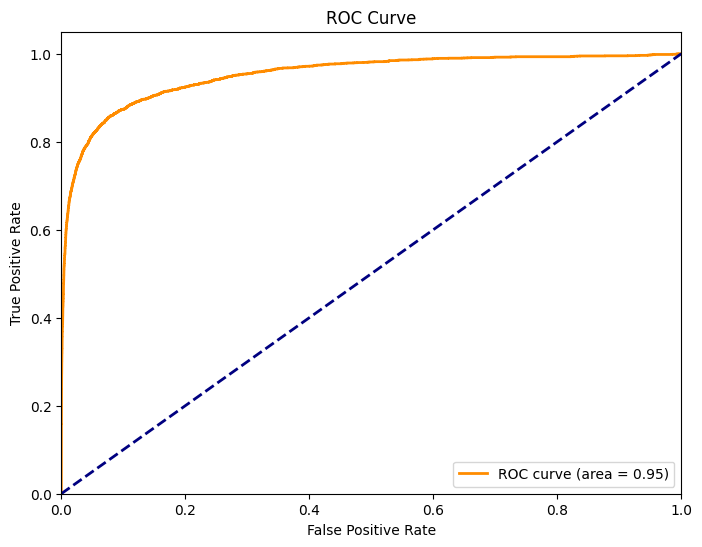

In [242]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Neuralnet approach seems to be working just fine. Accuracy is definitelly not the best metrix for this unbalanced dataset (our 90% labels are 0) but f1 score, which is much better metric here look respectable. There is definitely room for improvement, we should test different hyperparameters of our net, sadly training takes a while on my laptop. On the other hand, we could also prepare our training data bit more carefully, perhaps taking just first hlaf of each cycle, etc..

Now we should consider building pipeline which converts new incoming data into desireable feature vector, that is then fed into model trained above, I guess it is not the purpose of this assignemt though.